#Import Libraries and data

In [0]:
import numpy as np
import pandas as pd
import scipy
from datetime import datetime
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline


In [0]:
#upload S&P 500 data 'FRED' 2008-2017
sp_data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/SP500_raw.csv')

# Convert exchange rate to a number, with coersion to throw NA's if conversion not possible
sp_data['price'] = pd.to_numeric(sp_data.SP500, errors='coerce')

# Remove NA's
sp_data.dropna(inplace=True)

In [3]:
sp_data.head()

,DATE,SP500,price
0,2008-01-02,1447.16,1447.16
1,2008-01-03,1447.16,1447.16
2,2008-01-04,1411.63,1411.63
3,2008-01-07,1416.18,1416.18
4,2008-01-08,1390.19,1390.19


# Plot Time Series Data

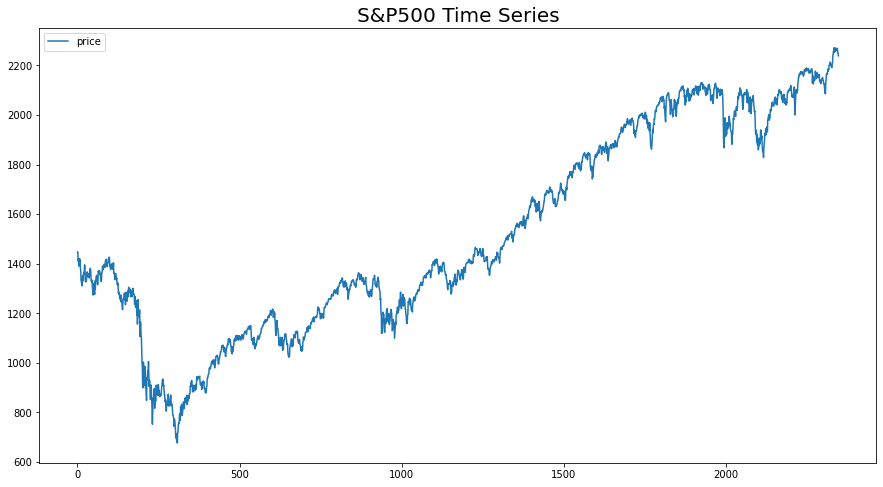

In [4]:
sp_data.plot(figsize=(15,8))
plt.title('S&P500 Time Series', fontsize=20)
plt.show();

# Create date-based index and Plot

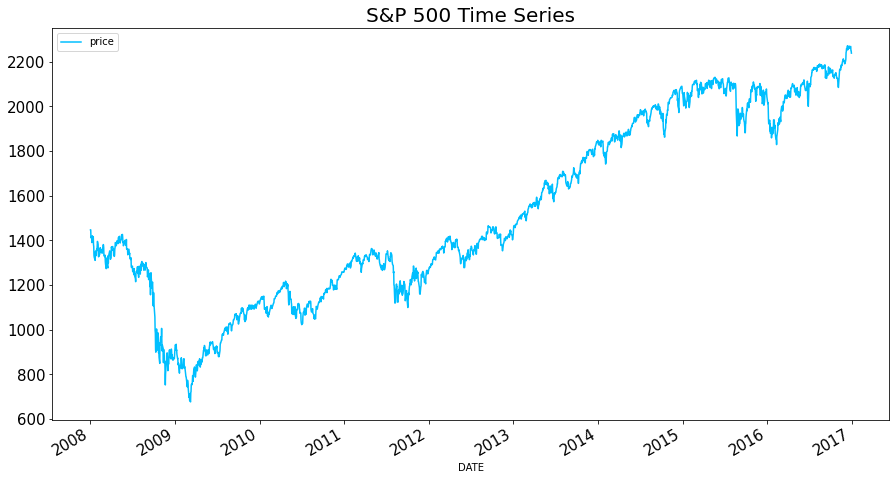

In [5]:
#use pandas to create a date bassed index

sp_data.index = pd.to_datetime(sp_data.DATE)
sp_data.plot(figsize=(15,8), fontsize=15, c='deepskyblue')
plt.title('S&P 500 Time Series', fontsize=20)
plt.show();

#Plot differencing (time series is non-stationary, D>0)

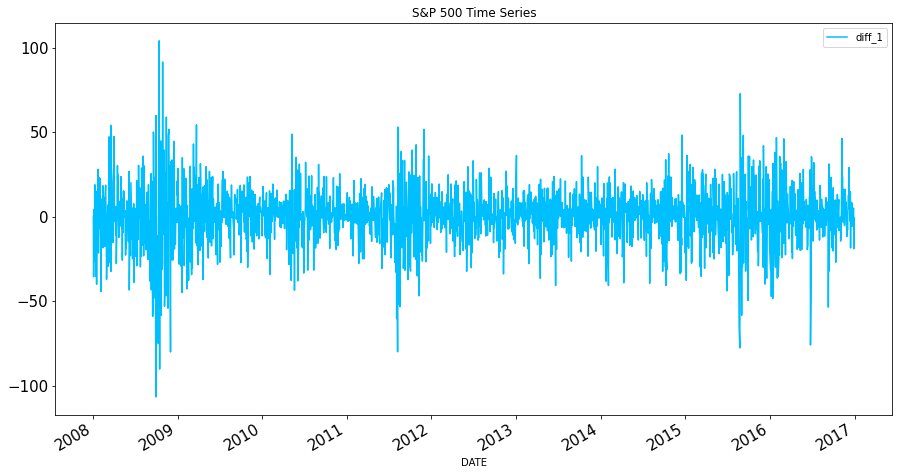

In [15]:
sp_data['diff_1'] = sp_data.price - sp_data.price.shift()
sp_data.plot(y='diff_1',figsize=(15,8), fontsize=15, c='deepskyblue')
plt.title('S&P 500 Time Series')
plt.show()

#PACF - Partial Autocorrelation Plot

We use the PACF to visualize the correaltion between lag and the series and to see if the lag is needed in the AR term.

Text(0.5, 1.0, 'S&P PACF')

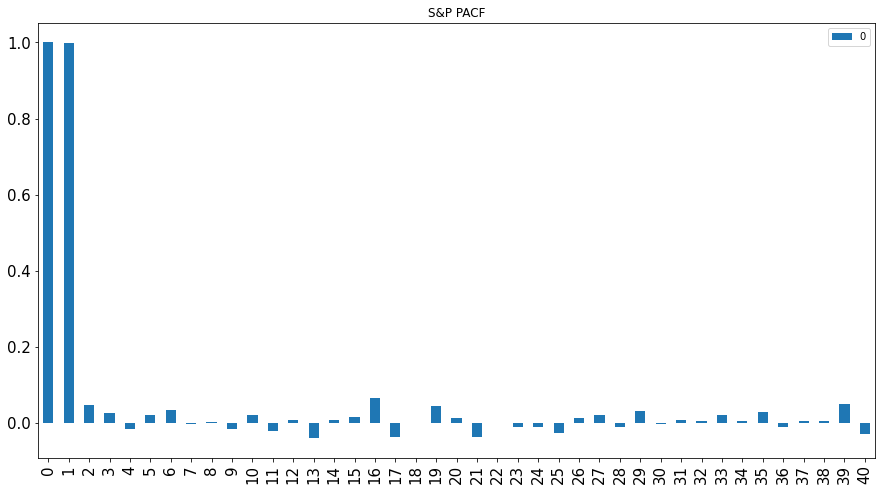

In [19]:
from statsmodels.tsa.stattools import pacf
x_acf = pd.DataFrame(pacf(sp_data.price))
x_acf.plot(kind='bar', figsize=(15,8), fontsize=15)
plt.title("S&P PACF")

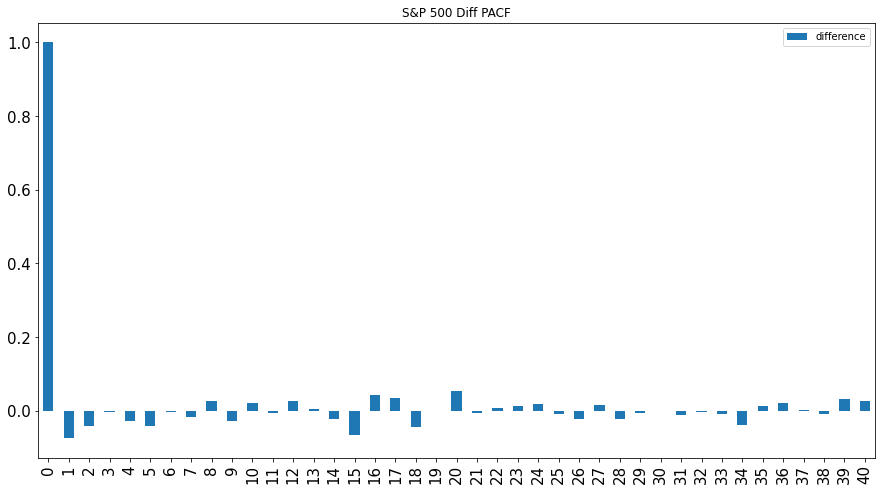

In [20]:
x_acf = pd.DataFrame(pacf(sp_data.diff_1[1:]))
x_acf.plot(kind='bar', figsize=(15,8), fontsize=15)
plt.title("S&P 500 Diff PACF")
plt.legend(['difference'])

#Buidling the model

#ARIMA (0,1,0)

In [21]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(sp_data.price, order=(0,1,0))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe());

                             ARIMA Model Results                              
Dep. Variable:                D.price   No. Observations:                 2266
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -9602.159
Method:                           css   S.D. of innovations             16.753
Date:                Fri, 24 Apr 2020   AIC                          19208.317
Time:                        19:58:35   BIC                          19219.769
Sample:                             1   HQIC                         19212.496
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3494      0.352      0.993      0.321      -0.340       1.039
Residuals Description
count    2.266000e+03
mean     5.080569e-15
std      1.675631e+01
min     -1.069694e+02
25%     -7.314369e+00

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


#ARIMA (1,0,0)

In [10]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(sp_data.price, order=(1,0,0))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                  price   No. Observations:                 2267
Model:                     ARMA(1, 0)   Log Likelihood               -9609.725
Method:                       css-mle   S.D. of innovations             16.753
Date:                Fri, 24 Apr 2020   AIC                          19225.451
Time:                        19:40:50   BIC                          19242.629
Sample:                             0   HQIC                         19231.718
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1686.5102    331.108      5.094      0.000    1037.550    2335.470
ar.L1.price     0.9993      0.001   1575.460      0.000       0.998       1.001
                                    Roots       

# ARIMA (1,0,1)

In [11]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(sp_data.price, order=(1,0,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                  price   No. Observations:                 2267
Model:                     ARMA(1, 1)   Log Likelihood               -9603.247
Method:                       css-mle   S.D. of innovations             16.705
Date:                Fri, 24 Apr 2020   AIC                          19214.494
Time:                        19:41:01   BIC                          19237.399
Sample:                             0   HQIC                         19222.851
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1707.4357    344.649      4.954      0.000    1031.935    2382.936
ar.L1.price     0.9994      0.001   1780.215      0.000       0.998       1.000
ma.L1.price    -0.0787      0.022     -3.614    

AIC 19214.494

#ARIMA(1,1,1)

In [12]:
from statsmodels.tsa.arima_model import ARIMA
model_111 = ARIMA(sp_data.price, order=(1,1,1))
model_111_fit = model_111.fit()
print(model_111_fit.summary())
print('Residuals Description')
print(model_111_fit.resid.describe())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.price   No. Observations:                 2266
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -9592.974
Method:                       css-mle   S.D. of innovations             16.685
Date:                Fri, 24 Apr 2020   AIC                          19193.947
Time:                        19:41:15   BIC                          19216.850
Sample:                             1   HQIC                         19202.304
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3529      0.289      1.222      0.222      -0.213       0.919
ar.L1.D.price     0.5832      0.155      3.765      0.000       0.280       0.887
ma.L1.D.price    -0.6565      0.144     

## AIC 19193.947

#ARIMA (5,1,5)

In [26]:
from statsmodels.tsa.arima_model import ARIMA
model_515 = ARIMA(sp_data.price, order=(5,1,5))
model_fit = model_515.fit()
print(model_fit.summary())
print('Residuals Description - ARIMA 515')
print(model_fit.resid.describe())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.price   No. Observations:                 2266
Model:                 ARIMA(5, 1, 5)   Log Likelihood               -9588.770
Method:                       css-mle   S.D. of innovations             16.629
Date:                Fri, 24 Apr 2020   AIC                          19201.540
Time:                        20:29:50   BIC                          19270.250
Sample:                             1   HQIC                         19226.610
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3539      0.291      1.218      0.223      -0.215       0.923
ar.L1.D.price    -0.8386      0.165     -5.071      0.000      -1.163      -0.514
ar.L2.D.price    -0.4547      0.235     

## AIC 19201.540

# Residuals

Text(0.5, 1.0, 'Histogram of Residuals')

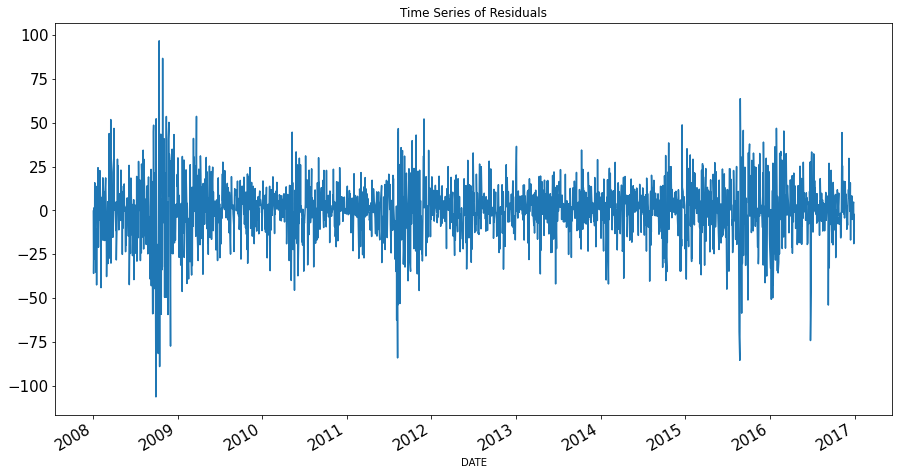

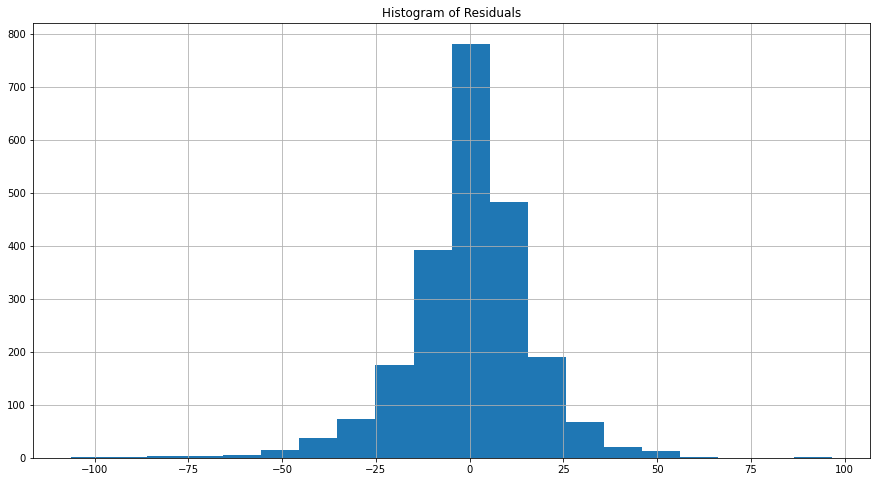

In [24]:
residuals = pd.DataFrame(model_111_fit.resid)

residuals.plot(legend=False, figsize=(15,8), fontsize=15)
plt.title('Time Series of Residuals')

residuals.hist(bins=20, figsize=(15,8))
plt.title('Histogram of Residuals')

#Interpreting ARIMA models

Can you interpret the output of one of the other models? 

What about ARIMA(1,1,1)? Which do you prefer? 

Then try some of your own coefficients below.

# Commpare Models with AIC

Compare the other models to ARIMA(1,1,1) below.

### Comparison using Out of Time Cross Validation

In [29]:
2267 *.75

1700.25

In [33]:
train = sp_data[:1700]
test = sp_data[1700:]

train

,DATE,SP500,price,diff_1
DATE,,,,
2008-01-02,2008-01-02,1447.16,1447.16,NaN
2008-01-03,2008-01-03,1447.16,1447.16,0.00
2008-01-04,2008-01-04,1411.63,1411.63,-35.53
2008-01-07,2008-01-07,1416.18,1416.18,4.55
2008-01-08,2008-01-08,1390.19,1390.19,-25.99
...,...,...,...,...
2014-09-25,2014-09-25,1965.99,1965.99,-32.31
2014-09-26,2014-09-26,1982.85,1982.85,16.86
2014-09-29,2014-09-29,1977.80,1977.80,-5.05


In [0]:
train = sp_data.price[:1700]

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.price   No. Observations:                 1699
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -7137.473
Method:                       css-mle   S.D. of innovations             16.152
Date:                Fri, 24 Apr 2020   AIC                          14282.945
Time:                        21:26:57   BIC                          14304.696
Sample:                             1   HQIC                         14290.998
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2983      0.327      0.913      0.361      -0.342       0.938
ar.L1.D.price     0.3302      0.191      1.727      0.084      -0.044       0.705
ma.L1.D.price    -0.4420      0.182     

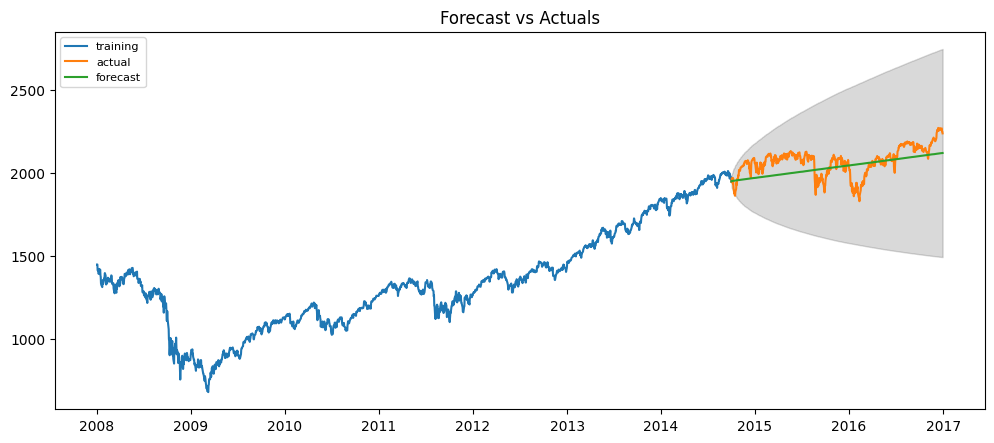

In [93]:

test = sp_data.price[1700:]


model_111 = ARIMA(train, order=(1,1,1))
model_111_fit = model_111.fit(disp=-1)
print(model_111_fit.summary())
print('Residuals Description')
print(model_111_fit.resid.describe())

# Forecast
fc, se, conf = model_111_fit.forecast(steps=567, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()


$$ exp((AIC_{min} - AIC_{x})/2) $$


Text(0.5, 1.0, 'Histogram of Residuals')

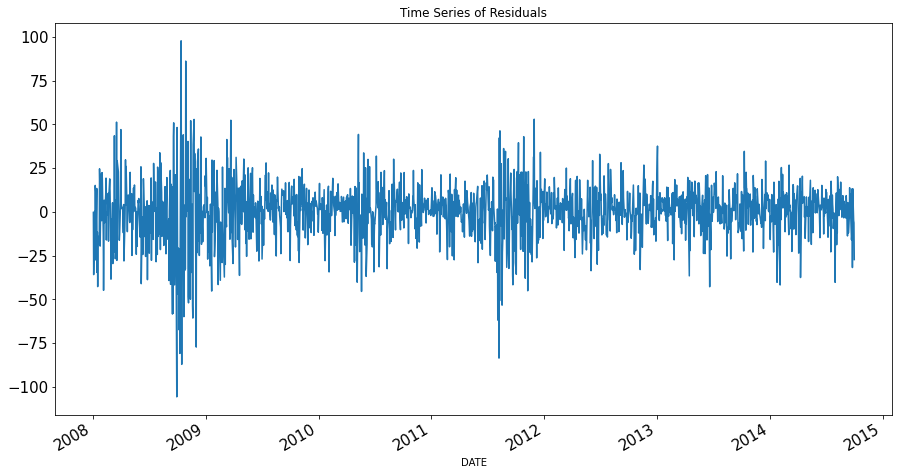

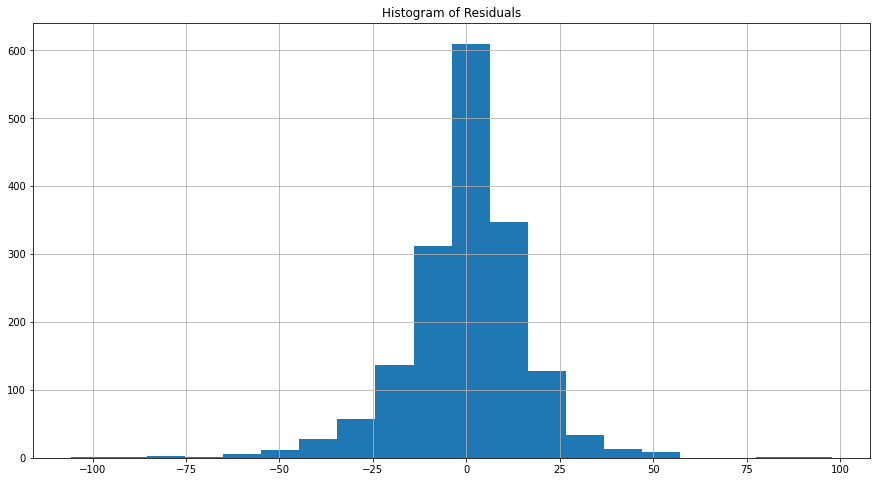

In [42]:
residuals = pd.DataFrame(model_111_fit.resid)

residuals.plot(legend=False, figsize=(15,8), fontsize=15)
plt.title('Time Series of Residuals')

residuals.hist(bins=20, figsize=(15,8))
plt.title('Histogram of Residuals')

In [0]:
#create df of predictions

forecasts = pd.DataFrame(fc, columns=['price'], index=test.index)

In [0]:
#create df of predictions
forecasts = pd.DataFrame(fc, columns=['price'], index=test.index)

#create df of actuals
actuals = pd.DataFrame(test, columns=['price'], index=test.index)
actual = actuals.price.values
fc = forecasts.price.values

#import autocorrealation

from statsmodels.tsa.stattools import acf



In [0]:
#create function to report accruacy of linear model

def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})


In [119]:
# create dict of results 
# convert results to series

data = forecast_accuracy(fc, test.values)
accuracy_results = pd.Series(data=data, index=data.keys())
accuracy_results

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


mape       0.034128
me       -34.530284
mae       70.464523
mpe       -0.015460
rmse      82.597787
acf1       0.969459
corr       0.462794
minmax     0.033601
dtype: float64

In [122]:
100 - accuracy_results[0]

99.96587168684854

# Conclusion - comparing ARIMA(1,1,1)

It is noteworthy that the coefficients in the best performing model is > 0 and has a significant p-value. Using the ARIMA model on the dataset without the OOTCV, our AIC score is 19193.947. 

our OOTCV model has an AIC score of 14282.945 and slightly higher p-value with p = .36. 

The best performing model is our OOTCV with TTS of 75/25.

Firstly, the constant is approximately .2983. 

Then each day is approximately equal to the previous day's value. 

This is explained through the AR1 coefficient being approximately .3302. 

The moving average term is approximately .4402, meaning that it will move against the previous error by about 44%. 

Our MAPE indicates that the model is 99.97% accurate when predicting 567 observations out of our model_111 dataset.